In [4]:
import pandas as pd
import numpy as np
import numpy_financial as npf
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
from numpy import *

from ggplot import *
from scipy.stats import logistic
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import *
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
import graphviz
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVC, SVR
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


from linearmodels.iv import IV2SLS
from scipy import stats
from scipy.stats import trim_mean #trimmed mean
from scipy.stats import *

import keyword

#open api 불러올 때 필요한 것
from urllib.request import urlopen #request package 설치
from bs4 import BeautifulSoup #bs4 package 설치

# 그래프에서 한글 깨지지 않기 위헤 사용함
from matplotlib import rcParams
from matplotlib import font_manager,rc

rcParams['axes.unicode_minus']=False
plt.rcParams['font.family']='Malgun Gothic'
font_name=font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font',family=font_name)

import FinanceDataReader as fdr
import plotly.graph_objects as go
import plotly.subplots as ms
import math

# LN8 가구주 직업별 소득 차이(1) 이어서
## 2 가계금융복지조사 데이터 분석



In [5]:
df=pd.read_csv('c:/temp/household_2020a.csv')
df.head()

,year,metro,id,sex,age,number,education,marriage,asset,debt,income,income_d,industry,job,house
0,2020,G1,10000112,1,34,3,6,2,112000,54500,6593,4599,F,3,2
1,2020,G1,10000132,2,45,2,8,2,42500,17500,17720,15257,J,2,3
2,2020,G1,10000162,2,73,1,2,3,5712,0,908,725,T,4,2
3,2020,G1,10000182,1,58,2,4,2,14870,0,2748,2431,C,5,2
4,2020,G1,10000192,2,27,1,4,1,814,0,1015,893,R,2,3


In [6]:
# id: 가구 번호
# income: 경상소득, _d: 가처분소득

In [7]:
income=df['income'].dropna()
len(income)

18064

In [8]:
income.describe()

count     18064.000000
mean       5494.711138
std        5563.512946
min           0.000000
25%        2026.000000
50%        4183.500000
75%        7331.750000
max      225116.000000
Name: income, dtype: float64

In [9]:
# 평균  : 5400만원 연봉, 등등, 최대 22억 5000만원 등등.

In [10]:
# 소수점 둘째자리까지 반올림 해라 = 셋째자리에서 반올림해라
np.round(5563.512946,2)

5563.51

(array([1.7854e+04, 1.8600e+02, 1.7000e+01, 3.0000e+00, 1.0000e+00,
        1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([     0. ,  22511.6,  45023.2,  67534.8,  90046.4, 112558. ,
        135069.6, 157581.2, 180092.8, 202604.4, 225116. ]),
 <BarContainer object of 10 artists>)

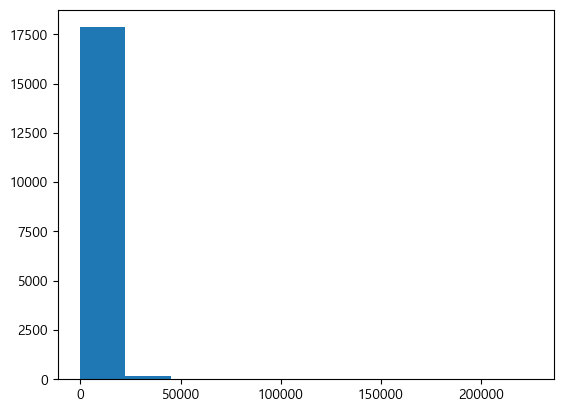

In [11]:
# 소득 분포 알아보자 = 소득 히스토그램 그려보자
# 경상소득의 분포를 알고 싶다
# 히스토그램을 그려본다

plt.hist(income)

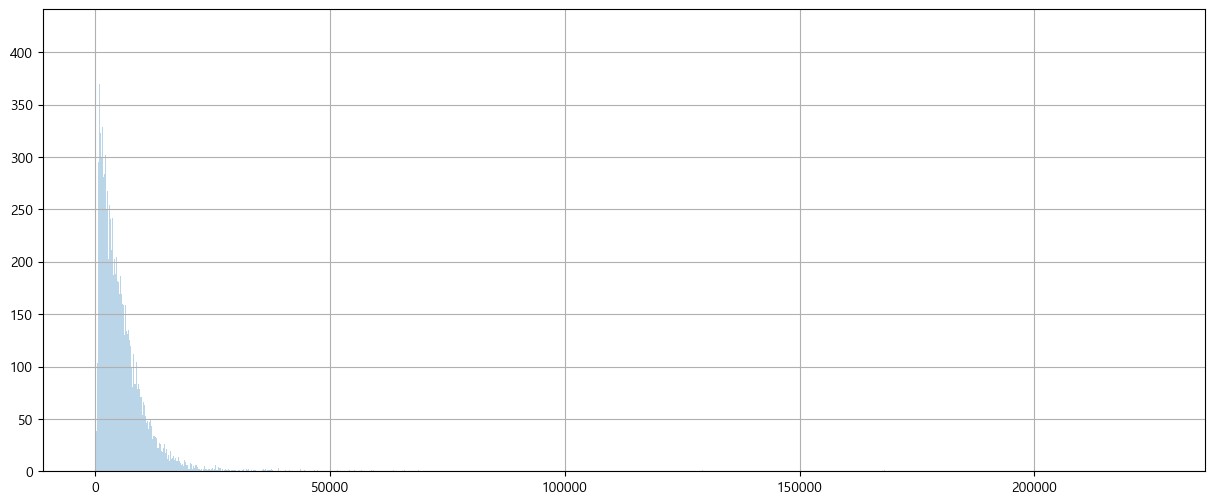

In [12]:
fig, ax=plt.subplots(figsize=(15,6))
ax.hist(income, alpha=0.3, bins=2000)
ax.grid()
plt.show()

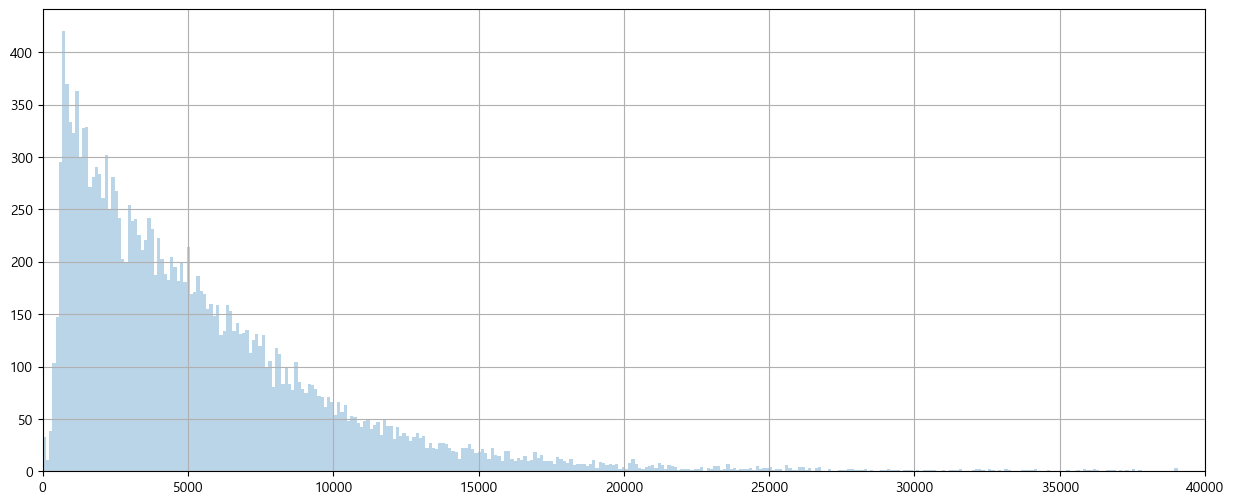

In [13]:
fig, ax=plt.subplots(figsize=(15,6))
ax.hist(income, alpha=0.3, bins=2000)
ax.grid()
ax.set_xlim(0,40000) # 최대 값이 20억이라서 위에가 길게 나와서, limit을 한 4억까지 그리도록 함
plt.show()

In [14]:
# 평균소득의 분포는 정규분포를 따를 것이다.
# 500개 추출해서 평균소득 구하고, 그걸 만번 반복해서 평균소득의 histogram 그려보자

n=10000
mn=[]

for i in range(n):
    sample=np.random.choice(income, size=500, replace=True) #무자귀 보건추출
    mean=np.mean(sample)
    mn.append(mean)
print(mn)

[5472.12, 5581.984, 5281.398, 6184.036, 5586.734, 5396.402, 5503.626, 5281.9, 5376.394, 5315.102, 5336.202, 5351.736, 5817.744, 6057.282, 5204.344, 5582.552, 5638.164, 5476.048, 5701.32, 5570.49, 5294.716, 4794.888, 5018.956, 5213.098, 5582.878, 5513.344, 5558.91, 5137.83, 5503.646, 5466.084, 4850.056, 5081.858, 5390.524, 5598.818, 5315.37, 5395.668, 5747.786, 5318.064, 5831.558, 5562.634, 5553.898, 5112.304, 5126.584, 5775.254, 5124.828, 5468.948, 5552.744, 5316.96, 5575.948, 5181.196, 5755.814, 5244.65, 5899.044, 5463.658, 5374.088, 5470.65, 5444.948, 6022.294, 5242.51, 5678.768, 5635.454, 6057.998, 5606.232, 6231.238, 4942.754, 5566.2, 5028.374, 5317.938, 5157.92, 5772.504, 5309.472, 5544.022, 5189.776, 5381.282, 5554.086, 5421.852, 5516.356, 5591.25, 5325.226, 5675.844, 5808.842, 5738.804, 5252.394, 5477.28, 5546.584, 5320.156, 5141.736, 5681.168, 5448.016, 5884.944, 5718.876, 5723.48, 5767.03, 5210.948, 5553.458, 5114.208, 5557.156, 5675.122, 5684.368, 5540.014, 5337.212, 5551.922

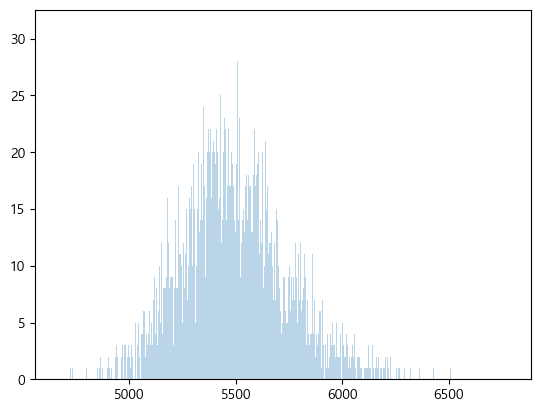

In [15]:
# 1만개의 표본평균을 히스토그램으로 그린다. by CLT, 표본평균은 정규분포를 따를 것으로 예상한다.
plt.hist(mn,alpha=0.3,bins=2000)
plt.show()

In [16]:
# 5500 중심으로, 정규분포
# 전체소득분포는 오른쪽으로 꼬리가 긴 분포이지만
# 18000개 표본으로부터 500개뽑은 평균소득은 정규분포(에 가깝다, centeral limit theorem)

## 3 동일 집단 간 차이 검정

- 귀무가설, 대립가설
- 귀무: 가설검정 통해 귀무 가설을 판단하는 것, REJECT OR NOT
- 검정통계량: 귀무가설이 맞다는 하에서 기대하는 값과의 차이

In [17]:
# Q4
z=(167-0)/(2606/np.sqrt(13000))
print(z)

7.306573138586187


In [18]:
# 검정통계량 가지고 어떻게 가설검정 판단 하느냐: 귀무가설 기가하느냐, 기각하지 못하느냐
# 7.306이 5%보다 작다 -> 귀무가설 기각 = 소득의 차이가 실제로는 0이고, 차이는 우연으로 나타났다

> 통계학에서는 " 두 현상에서는 차이가 없다" 라는 것을 귀무가설로 설정하고, 이를 기각하는 방법을 선택. 어떤 차이가 우연에 의해서 발생했을 가능성이 매우 적다는 것을 보여줌으로써 그 차이가 실질적으로 나타는 것을 말함

- 중요한 건
- 소득의 차이는 실질적으로 0이고, 만약에 13000가구 의 소득이  167만원 증가한 거는 우연
- 이러한 귀무가설을 검정하기위해 검정 통계량 계산
- 13000개에서 얻은 소득 차이의 평균에서 귀무가설기댓값을 빼고, 통계량의 표준오차로 나눔
- 검정통계량보다 z가 클 확률 = p-value, 
- p-vlaue가 0.05보다 작으면 귀무가설을 기각 한다


In [19]:
from scipy.stats import norm # 정규분포 계산위함

In [20]:
# 그럼 그 z=7.30일때 오른쪽 꼬리 확률
# 표준정규분포에서 계산한다
# p-value라고 부른다.

z=7.3
p_value=1-norm.cdf(z)
print(p_value)

1.438849039914203e-13


In [21]:
# e-13 = 10의 -13승

# [p_value] 알고 있어야함

In [22]:
# 2019, 2020년 데이터 불러오자
df10=pd.read_csv('c:/temp/household_2019a.csv')
df20=pd.read_csv('c:/temp/household_2020a.csv')
df10.head()

,year,metro,id,sex,age,number,education,marriage,asset,debt,income,income_d,industry,job,house
0,2019,G1,10500141,1,56,6,6,2,44460,18840,3360,2470,C,3,2
1,2019,G1,10500151,2,64,2,3,3,86485,7000,4090,3855,NaN,NaN,2
2,2019,G1,10500161,1,84,2,6,2,20350,0,774,730,NaN,NaN,1
3,2019,G1,10500171,1,57,4,4,2,46498,10300,7411,6215,C,5,1
4,2019,G1,10500181,1,56,5,5,2,158174,23900,9972,7574,P,1,1


In [23]:
df20.head()

,year,metro,id,sex,age,number,education,marriage,asset,debt,income,income_d,industry,job,house
0,2020,G1,10000112,1,34,3,6,2,112000,54500,6593,4599,F,3,2
1,2020,G1,10000132,2,45,2,8,2,42500,17500,17720,15257,J,2,3
2,2020,G1,10000162,2,73,1,2,3,5712,0,908,725,T,4,2
3,2020,G1,10000182,1,58,2,4,2,14870,0,2748,2431,C,5,2
4,2020,G1,10000192,2,27,1,4,1,814,0,1015,893,R,2,3


In [24]:
df11=df10[['year','id','income']]
df21=df20[['year','id','income']]
df21.head()

,year,id,income
0,2020,10000112,6593
1,2020,10000132,17720
2,2020,10000162,908
3,2020,10000182,2748
4,2020,10000192,1015


In [28]:
# id가 같은애들 끼리 찾아서, 2019 소득, 2020 소득 보고 두개 빼주면 됨
df=pd.merge(df11,df21,on='id',how='inner')
# inner join: 2년간 둘다 조사된 id만 남긴다
df.head()

,year_x,id,income_x,year_y,income_y
0,2019,10600141,5385,2020,2695
1,2019,10600211,2772,2020,1563
2,2019,10600221,1140,2020,6014
3,2019,10600241,803,2020,851
4,2019,10600271,8021,2020,7264


In [29]:
# income_x: 2019년 소득, _y:2020년 소득, 이 둘을 빼면됨

# index column을 id로 바꾸자
df1=df.set_index('id')
df1.head()

,year_x,income_x,year_y,income_y
id,,,,
10600141,2019,5385,2020,2695
10600211,2019,2772,2020,1563
10600221,2019,1140,2020,6014
10600241,2019,803,2020,851
10600271,2019,8021,2020,7264


In [30]:
df2=df1[['income_x','income_y']]
df2.head()

,income_x,income_y
id,,
10600141,5385,2695
10600211,2772,1563
10600221,1140,6014
10600241,803,851
10600271,8021,7264


In [31]:
df2['diff']=df2['income_y']-df2['income_x']
df2.head()

,income_x,income_y,diff
id,,,
10600141,5385,2695,-2690
10600211,2772,1563,-1209
10600221,1140,6014,4874
10600241,803,851,48
10600271,8021,7264,-757


In [32]:
df2['diff'].describe()

count     13910.000000
mean        211.838030
std        2935.260708
min      -88470.000000
25%        -371.000000
50%         155.000000
75%         840.000000
max      137662.000000
Name: diff, dtype: float64

In [34]:
# 평균소득이 211만원, 표편이 290, 표본크기 13910개

In [36]:
# 검정통계량 , p-value 구하기

z=(211-0)/(2935/np.sqrt(13910))
print(z)

8.478868791464198


In [37]:
p_value=1-norm.cdf(z)
print(p_value)

0.0


In [38]:
# 거의 0에 가까운 값. 즉 0.05보다 훨씬 작은 값 -> 귀무가설 기각한다
# p-value: 검정통계량 값에 대한 오른쪽 꼬리확률
# 귀무가설: 소득차이 없다
# 2019년에 비해 2020년에 소득이 실질적으로 증가한다



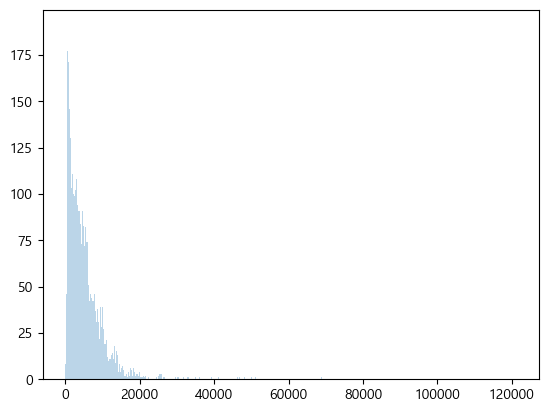

In [40]:
# 2019,2020 소득분포 hist 그려보기

plt.hist(df2['income_x'],alpha=0.3,bins=2000)
plt.show()

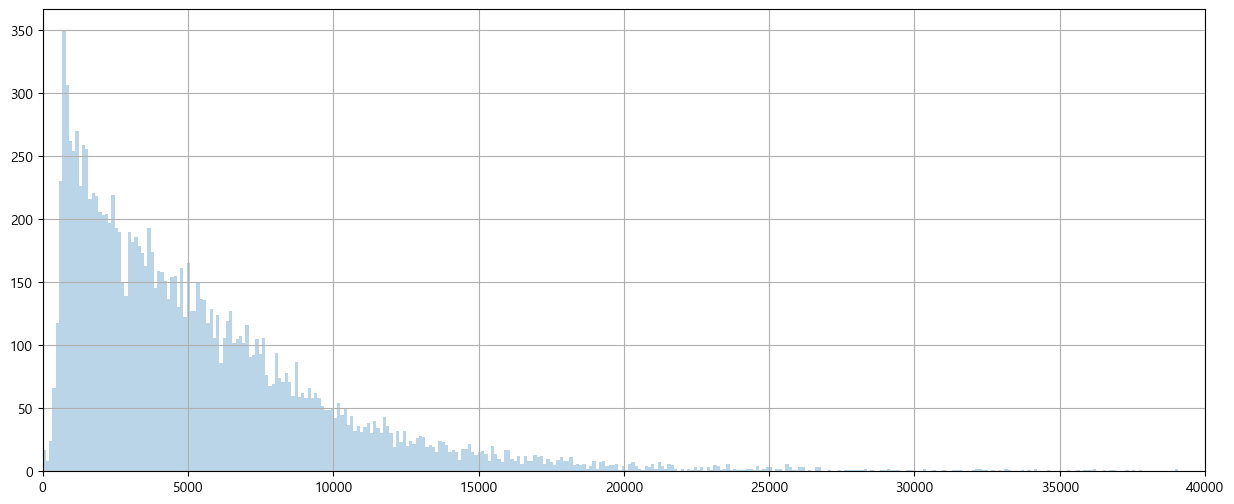

In [43]:
fig, ax=plt.subplots(figsize=(15,6))
ax.hist(df2['income_y'], alpha=0.3, bins=2000)
ax.grid()
ax.set_xlim(0,40000) # 최대 값이 20억이라서 위에가 길게 나와서, limit을 한 4억까지 그리도록 함
plt.show()

 ### inner join말고도 outer join, left join, right join 도 있음
- inner join: 양쪽 데이터셋 모두 값이 있는 것만 남김
- 어느 한쪽에만 있어도 삭제하지 않고 남기는 느낌들이 outer, left, right, ...